table size = 4096 kB


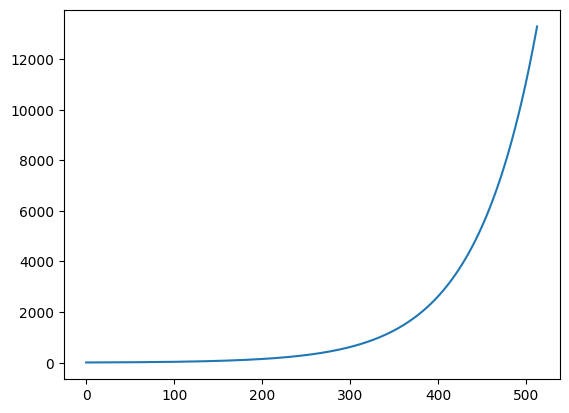

In [5]:
import numpy as np
import matplotlib.pyplot as plt

TABLE_SIZE = 2**9

# таблица же не напрямую а еще через калибровку проходит

print(f"table size = {TABLE_SIZE * 4 * 2} kB")

pitch = np.arange(TABLE_SIZE + 1)
pitch = pitch/(TABLE_SIZE/128)
pitch = 440 * 2**((pitch-69)/12)

plt.plot(pitch)
plt.show()


In [6]:
SAMPLE_RATE = 64e6/333
print(f"sample rate = {SAMPLE_RATE}")
# print(f"norm. inc = {2**32 / SAMPLE_RATE}")
inc = 2**32 / SAMPLE_RATE * pitch

recp = 2**32 / ((np.roll(inc,-1) + inc) / 2)

f = open("scale.txt", 'w')
for i in range(len(inc)):
    f.write(f"{{{hex(int(inc[i] + 0.5))}, {hex(int(recp[i] + 0.5))}}}, ")
f.close()

sample rate = 192192.1921921922
